In [257]:
import numpy as np
from matplotlib import pyplot as plt

C1

Text(0.5, 1.0, 'Specific Heat vs Temperature')

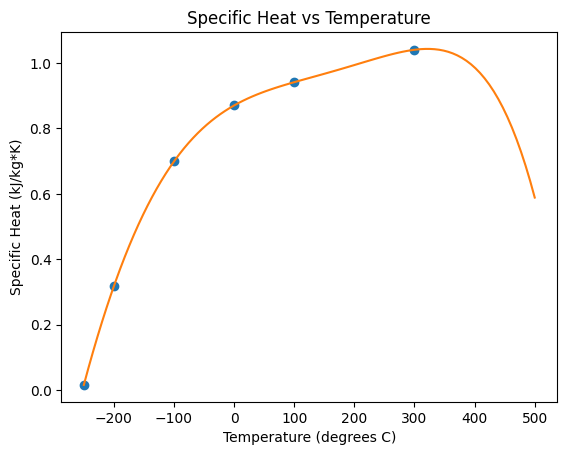

In [258]:
#polynomial interpolation using problem 15 data

xData = np.array([-250, -200, -100, 0, 100, 300], dtype=float)
yData = np.array([.0163, .318, .699, .870, .941, 1.04], dtype=float)

xVals = np.linspace(-250, 500, 100, dtype=float)

length = np.shape(xData)[0]

def Interpolation(xVals, xData, yData):
    C = np.zeros_like(xData)
    H = np.zeros((length, length))

    for rowNum in range(length):
        for colNum in range(length):
            H[rowNum, colNum] = xData[rowNum]**colNum

    inverseH = np.linalg.inv(H) 

    C = np.matmul(inverseH, yData) #calculates C from matrix multiplication of inverseH and yData

    for rowNum in range(length):
        Li = 0 
        for colNum in range(length):
            Li = Li + (xVals**colNum)*C[colNum]

    return Li

yVals = [Interpolation(x, xData, yData) for x in xVals]

plt.plot(xData, yData, 'o')
plt.plot(xVals, yVals)
plt.xlabel("Temperature (degrees C)")
plt.ylabel("Specific Heat (kJ/kg*K)")
plt.title("Specific Heat vs Temperature")

C2


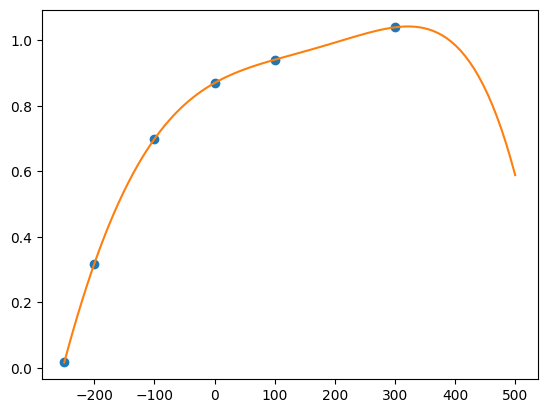

In [259]:
#Lagrange interpolation
xData = np.array([-250, -200, -100, 0, 100, 300], dtype=float)
yData = np.array([.0163, .318, .699, .870, .941, 1.04], dtype=float)

length = np.shape(xData)[0]

#this is an adapted version of the FirstBasicFunc function from the lab
def Lagrange(x, xData, yData):
    L = np.zeros_like(xData) #value will be stored and added up as we go
    for i in range(length):
        Li = 1.0 #store the current polynomial
        for j in range(length):
            if j != i: #ignore when equal
                Li = Li * (x - xData[j]) / (xData[i] - xData[j])
        L[i] = Li #updates this value in the list

    yVal = np.dot(L, yData) #clever way to scale the values instead of doing it in complicated loops 

    return yVal

xVals = np.linspace(-250, 500, 100)
yVals = [Lagrange(x, xData, yData) for x in xVals]

plt.plot(xData, yData, 'o')
plt.plot(xVals, yVals)

Problem 9

Text(0, 0.5, 'Density (kg/m^3)')

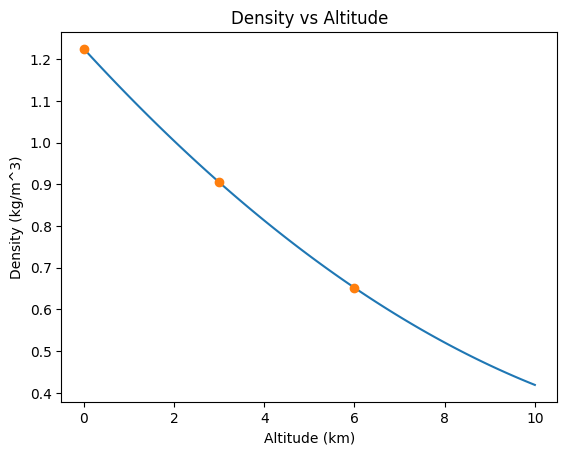

In [260]:
xData = np.array([0, 3, 6])
yData = np.array([1.225, .905, .652])

def f(x):
    #horrifically done but it works for now, will adapt for C2
    L0 = ((x-3)/(0-3))*((x-6)/(0-6)) * 1.225
    L1 = ((x-0)/(3-0))*((x-6)/(3-6)) * .905
    L2 = ((x-0)/(6-0))*((x-3)/(6-3)) * .652
    L = L0 + L1 + L2
    return L

xVals = np.linspace(0, 10, 100)
yVals = f(xVals)

plt.plot(xVals, yVals)
plt.plot(xData, yData, 'o') #o makes them points rather than a line
plt.title("Density vs Altitude")
plt.xlabel("Altitude (km)")
plt.ylabel("Density (kg/m^3)")

Question 15

Even though the polynomial fits the data nicely, the polynomial begins
to dive down after 300 degrees, which is unlikely to be the actual trend.
Interpolation works well for ranges within data, but not very good for extrapolating far past the data itself. 


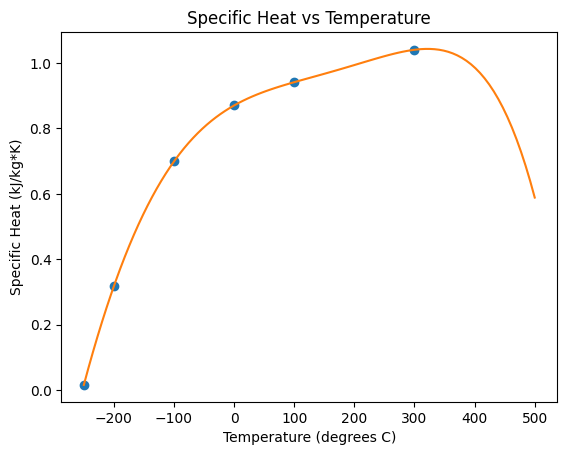

In [261]:
#polynomial interpolation using problem 15 data

xData = np.array([-250, -200, -100, 0, 100, 300], dtype=float)
yData = np.array([.0163, .318, .699, .870, .941, 1.04], dtype=float)

xVals = np.linspace(-250, 500, 100, dtype=float)

length = np.shape(xData)[0]

def Interpolation(xVals, xData, yData):
    C = np.zeros_like(xData)
    H = np.zeros((length, length))

    for rowNum in range(length):
        for colNum in range(length):
            H[rowNum, colNum] = xData[rowNum]**colNum

    inverseH = np.linalg.inv(H)

    C = np.matmul(inverseH, yData) #calculates C from matrix multiplication of inverseH and yData

    for rowNum in range(length):
        Li = 0 
        for colNum in range(length):
            Li = Li + (xVals**colNum)*C[colNum]

    return Li

yVals = [Interpolation(x, xData, yData) for x in xVals]

plt.plot(xData, yData, 'o')
plt.plot(xVals, yVals)
plt.xlabel("Temperature (degrees C)")
plt.ylabel("Specific Heat (kJ/kg*K)")
plt.title("Specific Heat vs Temperature")

print(f"Even though the polynomial fits the data nicely, the polynomial begins\nto dive down after 300 degrees, which is unlikely to be the actual trend.\nInterpolation works well for ranges within data, but not very good for extrapolating far past the data itself. ")

Question 20

The estimated density at 10.5km is 0.3177761105228538kg/m^3.


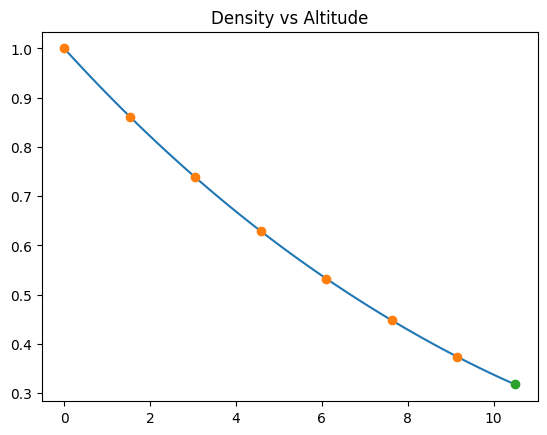

In [262]:
xData = np.array([0, 1.525, 3.050, 4.575, 6.10, 7.625, 9.150], dtype=float)
yData = np.array([1, .8617, .7385, .6292, .5328, .4481, .3741], dtype=float)

xVals = np.linspace(0, 10.5, dtype=float)

length = np.shape(xData)[0]

def Interpolation(xVals, xData, yData):
    C = np.zeros_like(xData)
    H = np.zeros((length, length))

    for rowNum in range(length):
        for colNum in range(length):
            H[rowNum, colNum] = xData[rowNum]**colNum

    inverseH = np.linalg.inv(H)

    C = np.matmul(inverseH, yData) #calculates C from matrix multiplication of inverseH and yData

    for rowNum in range(length):
        Li = 0 
        for colNum in range(length):
            Li = Li + (xVals**colNum)*C[colNum]

    return Li

yVals = [Interpolation(x, xData, yData) for x in xVals]

plt.plot(xVals, yVals)
plt.plot(xData, yData, 'o')
plt.title("Density vs Altitude")
 
extrapolatedValue = yVals[-1]
plt.plot(10.5, extrapolatedValue, 'o')
print(f"The estimated density at 10.5km is {yVals[-1]}kg/m^3.")